In [ ]:
## toy dataset (wine) to utilise K-Means + Agglomerative Clustering
## outcome is not ideal, summary at the end of script describe next steps

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
orig = pd.read_csv("../Datasets/winequality-white.csv")

print(orig.shape)
orig.head()

(4898, 12)


,FAcidity,VAcidity,Citric,Sugar,Chlorides,SugarDioxide,SulfurDioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [23]:
orig.Quality.value_counts().sort_index()

3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: Quality, dtype: int64

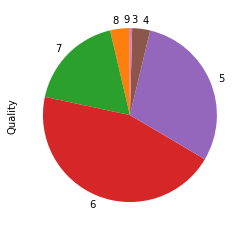

In [43]:
orig.Quality.value_counts().sort_index(ascending=False).plot(kind='pie', startangle=90)

In [129]:
df = orig.copy()

## Group quality into two groups

In [130]:
df['Quality'] = np.where(df['Quality'] <= 5, 0, 1)

df.Quality.value_counts()

1    3258
0    1640
Name: Quality, dtype: int64

## Normalise data

In [131]:
from sklearn.preprocessing import MinMaxScaler

In [132]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.iloc[:, :-1])

df_scaled[:5]

array([[0.30769231, 0.18627451, 0.21686747, 0.30828221, 0.10682493,
        0.14982578, 0.37354988, 0.26778485, 0.25454545, 0.26744186,
        0.12903226],
       [0.24038462, 0.21568627, 0.20481928, 0.01533742, 0.11869436,
        0.04181185, 0.28538283, 0.13283208, 0.52727273, 0.31395349,
        0.24193548],
       [0.41346154, 0.19607843, 0.24096386, 0.09662577, 0.12166172,
        0.09756098, 0.20417633, 0.15403894, 0.49090909, 0.25581395,
        0.33870968],
       [0.32692308, 0.14705882, 0.19277108, 0.12116564, 0.14540059,
        0.15679443, 0.41067285, 0.16367843, 0.42727273, 0.20930233,
        0.30645161],
       [0.32692308, 0.14705882, 0.19277108, 0.12116564, 0.14540059,
        0.15679443, 0.41067285, 0.16367843, 0.42727273, 0.20930233,
        0.30645161]])

## K-Means (n=2)

In [133]:
kmeans = KMeans(n_clusters=2, max_iter=2000, algorithm = 'auto')
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [134]:
from sklearn.cluster import KMeans

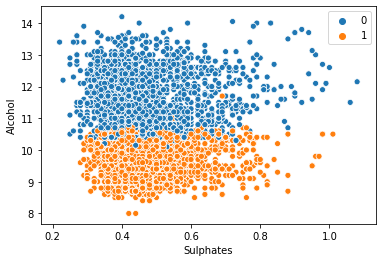

In [135]:
sns.scatterplot(x=orig.Sulphates,
                y=orig.Alcohol,
                hue=kmeans.labels_
            )

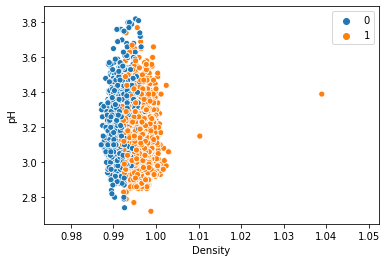

In [136]:
sns.scatterplot(x=orig.Density,
                y=orig.pH,
                hue=kmeans.labels_
            )

In [137]:
df['Label'] = kmeans.labels_

df.head(2)

,FAcidity,VAcidity,Citric,Sugar,Chlorides,SugarDioxide,SulfurDioxide,Density,pH,Sulphates,Alcohol,Quality,Label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,1,1


In [138]:
## K-Means does not do a good job at reflecting Quality groups
df.groupby(['Label', 'Quality']).size()

Label  Quality
0      0           358
       1          1881
1      0          1282
       1          1377
dtype: int64

## Agglomerative Clustering (n=2)

In [139]:
from sklearn.cluster import AgglomerativeClustering

In [140]:
aggc = AgglomerativeClustering(n_clusters=2, linkage='ward')

agg = aggc.fit(df_scaled)

In [142]:
df['Label_Agg'] = agg.labels_

df.head(2)

,FAcidity,VAcidity,Citric,Sugar,Chlorides,SugarDioxide,SulfurDioxide,Density,pH,Sulphates,Alcohol,Quality,Label,Label_Agg
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,1,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,1,1,1


In [143]:
## Agglo Clustering also does not do a good job at reflecting Quality
## clusters of n=2 likely not an optimal grouping
df.groupby(['Label_Agg', 'Quality']).size()

Label_Agg  Quality
0          0           533
           1          2215
1          0          1107
           1          1043
dtype: int64

## Group quality into three groups

In [155]:
df = orig.copy()

In [156]:
## assumption here is that mediocre wine (i.e. quality 6) may fall into its own category
## group of n=3 does balance the classes slightly more

df['Quality'] = np.where(df['Quality'] <= 5, 0,
                   np.where(df['Quality'] == 6, 1,
                   np.where(df['Quality'] > 6, 2, np.NaN)))

df.Quality.value_counts().sort_index()

0.0    1640
1.0    2198
2.0    1060
Name: Quality, dtype: int64

In [157]:
kmeans = KMeans(n_clusters=3, max_iter=2000, algorithm = 'auto')
kmeans.fit(df_scaled)

aggc = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg = aggc.fit(df_scaled)

df['Label'] = kmeans.labels_
df['Label_Agg'] = agg.labels_

df.head(2)

,FAcidity,VAcidity,Citric,Sugar,Chlorides,SugarDioxide,SulfurDioxide,Density,pH,Sulphates,Alcohol,Quality,Label,Label_Agg
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,1.0,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,1.0,2,1


## Use confusion matrix to evaluate clustering performance

In [164]:
from sklearn.metrics import confusion_matrix

In [165]:
confusion_matrix(df.Quality, df.Label)

array([[ 237, 1056,  347],
       [ 749,  817,  632],
       [ 632,  149,  279]], dtype=int64)

In [166]:
confusion_matrix(df.Quality, df.Label_Agg)

array([[ 329, 1107,  204],
       [ 647,  870,  681],
       [ 303,  173,  584]], dtype=int64)

In [ ]:
## Summary of findings:
## clusters of n=2 or n=3 do not perform well for matching the grouping of quality
## Linear regression on quality raw values, or logistic regression for groups, may perform better
## Using groupby / confusion matrix for evaluate is less ideal, should revisit using entropy